# Intro:

Analyzing the provided financial transaction data to calculate the total income, total expenses, and net balance.
- Identify and visualize the top spending categories, showing their percentage breakdown.
- Visualize monthly trends for both income and expenses.
- Summarize key financial insights and suggest next steps for deeper investigation or budgeting.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://docs.google.com/spreadsheets/d/16_d7H_DHrN4GfoOJwkZJ1iylU-sBhb0bdjoJkllZTLo/export?format=csv"

# data = pd.read_csv(url, sep=';', engine='python', on_bad_lines='skip')
data = pd.read_csv(url)

In [ ]:
display(
    data.info(),
    data.dtypes,
    data.shape
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         636 non-null    object 
 1   description  601 non-null    object 
 2   amount       636 non-null    int64  
 3   balance      564 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 20.0+ KB


None

,0
date,object
description,object
amount,int64
balance,float64


(636, 4)

In [ ]:
data["date"] = pd.to_datetime(data["date"])

In [ ]:
data.isnull().mean().sort_values(ascending = False)

,0
balance,0.113208
description,0.055031
date,0.000000
amount,0.000000


> This cell calculates the percentage of missing values for each column in the 'data' DataFrame.
- `data.isnull()`: Creates a boolean DataFrame where `True` indicates a missing value (NaN).
- `.mean()`: Calculates the mean of each column. Since `True` is treated as 1 and `False` as 0,
the mean gives the proportion (or percentage) of missing values.
- `.sort_values(ascending=False)`: Sorts the resulting series of missing percentages in descending order, making it easy to identify columns with the most missing data.

In [ ]:
data[data.isnull().any(axis = 1)]

,date,description,amount,balance
1,2024-12-30,NaN,-13585,-2235568.0
4,2024-08-08,POS Purchase,-14107,NaN
9,2024-08-27,Cash Deposit,20000,NaN
12,2024-11-27,Data Subscription,-10479,NaN
14,2024-12-02,Loan Repayment,-15000,NaN
...,...,...,...,...
607,2024-12-08,NaN,-820,NaN
611,2024-11-10,Fuel Station,-6157,NaN
613,2024-09-12,Medical Expense,-7462,NaN
615,2024-10-15,NaN,-1191,-1284406.0


In [ ]:
data["description"] = data["description"].fillna("Unknown")

#### Grouping the months.

In [ ]:
data["Month"] = data["date"].dt.strftime("%B")

In [ ]:
data = data.sort_values(by = "Month")


Dropping the `balance` column.

In real analytics work:
- unreliable columns get removed
- the decision is documented
- analysis proceeds with trustworthy fields.

In [ ]:
data = data.drop("balance", axis = 1)

In [ ]:
def categories(description):

    description = str(description).lower()

    if pd.isna(description) or "unknown" in description:
        return "Unknown"
    elif "pos" in description or "trf" in description or "transfer out" in description:
        return "POS Transfers"
    elif "withdrawal" in description:
        return "Cash"
    elif "bill" in description:
        return "Bills"
    elif "supermarket" in description or "store" in description:
        return "Groceries"
    elif "fuel" in description:
        return "Fuel"
    elif "restaurant" in description or "food" in description:
        return "Food"
    elif "medical" in description or "pharmacy" in description:
        return "Medical"
    elif "subscription" in description:
        return "Subscription"
    elif "deposit" in description or "transfer in" in description:
        return "Other Income"
    elif "airtime" in description:
        return "Airtime"
    elif "school" in description:
        return "School Fees"
    elif "salary" in description:
        return "Salary"
    elif "loan" in description:
        return "Loan"
    elif "rent" in description:
        return "Rent"
    elif "uber" in description or "bolt" in description:
        return "Transport"
    else:
        return "Miscellaneous"

In [ ]:
data["category"] = data["description"].apply(categories)
display(
    data["category"].unique(),
    data["category"].value_counts()
)

array(['Cash', 'Bills', 'POS Transfers', 'Fuel', 'Unknown', 'Groceries',
       'Food', 'Medical', 'Subscription', 'Airtime', 'Miscellaneous',
       'Other Income', 'Loan', 'Rent', 'School Fees', 'Salary',
       'Transport'], dtype=object)

,count
category,
POS Transfers,121
Subscription,71
Unknown,57
Medical,48
Cash,42
Food,41
Bills,40
Transport,31
Loan,30


In [ ]:
# data["Month"] = pd.to_datetime(data["Month"] + ' 2000', format='%B %Y')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 467 to 0
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         636 non-null    datetime64[ns]
 1   description  636 non-null    object        
 2   amount       636 non-null    int64         
 3   Month        636 non-null    object        
 4   category     636 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 29.8+ KB


In [ ]:
data = data[["date", "description", "category", "Month", "amount"]]

data.columns = data.columns.str.title()

In [ ]:
data.describe()

,Date,Amount
count,636,636.000000
mean,2024-09-27 04:00:00,-3614.860063
min,2024-07-01 00:00:00,-80000.000000
25%,2024-08-11 00:00:00,-11856.750000
50%,2024-09-25 00:00:00,-7703.500000
75%,2024-11-15 00:00:00,-3050.500000
max,2024-12-31 00:00:00,220000.000000
std,NaN,32419.979510


In [ ]:
invalid = data[(data["Amount"] > 0)]

valid = data[data["Amount"] < 0]

print(
    len(invalid),
    len(valid)
)

83 553


In [ ]:
data[data["Description"].isna() & data["Category"].notna()]

,Date,Description,Category,Month,Amount


In [ ]:
data.sample(14, random_state = 56)

,Date,Description,Category,Month,Amount
0,2024-09-12,School Fees,School Fees,September,-45000
447,2024-11-07,Spotify Subscription,Subscription,November,-4418
570,2024-10-21,Fuel Station,Fuel,October,-14483
348,2024-09-22,Fuel Station,Fuel,September,-6251
32,2024-07-14,Supermarket,Groceries,July,-8070
618,2024-10-01,Medical Expense,Medical,October,-3242
519,2024-09-04,Transfer In,Other Income,September,20000
88,2024-08-03,Data Subscription,Subscription,August,-12115
492,2024-12-27,Unknown,Unknown,December,862
225,2024-12-10,Cash Withdrawal,Cash,December,-5000


In [ ]:
data.sample(97, random_state = 34)

,Date,Description,Category,Month,Amount
52,2024-09-11,Internet Subscription,Subscription,September,-4070
420,2024-10-20,Pharmacy Purchase,Medical,October,-3185
630,2024-07-05,Transfer Out,POS Transfers,July,-6652
378,2024-11-04,Uber Ride,Transport,November,-9625
474,2024-12-14,Salary Payment,Salary,December,180000
...,...,...,...,...,...
449,2024-11-09,Fuel Station,Fuel,November,-11624
260,2024-11-19,Transfer Out,POS Transfers,November,-14851
239,2024-12-25,Cash Withdrawal,Cash,December,-20000
336,2024-12-01,Unknown,Unknown,December,-3668


In [ ]:
#data[data["description"] == "POS"]

#data.groupby("description").sum(numeric_only = True)

#data

#data["category"] = []
#data["description"].str.contains("Bill")

#data["description"] = data["description"].str.replace(" Purchase", "")

In [ ]:
#groups = data.groupby(["category", "Month"]).sum(numeric_only = True).sort_values(by = "Month")

cat_group = data.groupby("Category").sum(numeric_only = True).sort_values(by = "Category")

month_group = data.groupby("Month").sum(numeric_only = True).sort_values(by = "Month")

## Analyze Total Income, Expenses, and Net Balance

To calculate the total income, I will sum all positive values in the 'Amount' column of the 'data' DataFrame. To calculate the total expenses, I will sum all negative values in the 'Amount' column.

Finally, I will calculate the net balance by summing all values in the 'Amount' column.

In [ ]:
income = cat_group[cat_group["Amount"] > 0]
expenses = cat_group[cat_group["Amount"] < 0]

total_inc = income["Amount"].sum()
total_exp = expenses["Amount"].abs().sum()

In [ ]:

net_bal = total_inc - abs(total_exp)
bal = cat_group["Amount"].sum()

print(net_bal, bal)

-2299051 -2299051


In [ ]:
salary = cat_group.loc["Salary"]
other_inc = cat_group.loc["Other Income"]

net_bal_salary_exp = salary - abs(total_exp)

print(f"Total Expenses: {abs(total_exp)}\n\nTotal Income: {total_inc}\n\n")
display(salary, net_bal_salary_exp, other_inc)

Total Expenses: 5404051

Total Income: 3105000




,Salary
Amount,2740000


,Salary
Amount,-2664051


,Other Income
Amount,365000


## Top Spending Categories Analysis

First, I will filter the `cat_group` DataFrame to include only categories with negative 'Amount' values, representing expenses, and store this in a new DataFrame called `expense_categories`. Then, I will calculate the total sum of these negative amounts to get the total expenses.

In [ ]:
exp_cat = cat_group[cat_group["Amount"] < 0].abs()

inc_cat = cat_group[cat_group["Amount"] > 0]

In [ ]:
exp_cat["Percentage"] = (exp_cat["Amount"] * 100) / abs(total_exp)

inc_cat["Percentage"] = (inc_cat["Amount"] * 100) / total_inc


display(
    exp_cat,
    inc_cat
)

/tmp/ipython-input-917800872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_cat["Percentage"] = (inc_cat["Amount"] * 100) / total_inc


,Amount,Percentage
Category,,
Airtime,40369,0.747014
Bills,338758,6.268594
Cash,490000,9.067272
Food,283781,5.251264
Fuel,189776,3.511736
Groceries,219544,4.062582
Loan,320000,5.921484
Medical,334959,6.198295
Miscellaneous,88160,1.631369


,Amount,Percentage
Category,,
Other Income,365000,11.755233
Salary,2740000,88.244767


I will calculate the percentage of each expense category by dividing each category's absolute amount by the total absolute expenses and store these percentages in a new column in `expense_categories`.

In [ ]:
sorted_exp_cat = exp_cat.sort_values(by = "Percentage", ascending = False)

## Investigating 'Unknown' and 'Miscellaneous' Categories

To begin the investigation, I will filter the 'data' DataFrame to isolate transactions belonging to the 'Unknown' or 'Miscellaneous' categories, as per the instructions. Then, I will display the first 10 rows of this filtered data to get a quick overview of the transactions in these categories.

In [ ]:
unknown_misc_transactions = data[data['Category'].isin(['Unknown', 'Miscellaneous'])]
display(
    f"The two unknown and miscellaneous categories contains: {unknown_misc_transactions["Description"].unique()}",
    unknown_misc_transactions.sample(10, random_state = 20)
    )

"The two unknown and miscellaneous categories contains: ['Unknown' 'Gym Membership']"

,Date,Description,Category,Month,Amount
321,2024-11-23,Unknown,Unknown,November,-777
309,2024-07-12,Unknown,Unknown,July,-13765
363,2024-07-31,Unknown,Unknown,July,-1321
217,2024-09-07,Unknown,Unknown,September,-13227
224,2024-09-22,Unknown,Unknown,September,-1318
529,2024-07-26,Unknown,Unknown,July,-12583
440,2024-08-27,Unknown,Unknown,August,-3920
601,2024-12-08,Gym Membership,Miscellaneous,December,-6944
394,2024-12-25,Unknown,Unknown,December,-2866
182,2024-08-18,Unknown,Unknown,August,-1155


To identify common patterns and potential re-categorization opportunities, I will display the unique values and their counts for the 'Description' column within the `unknown_misc_transactions` DataFrame.

In [ ]:
display(unknown_misc_transactions['Description'].value_counts())

,count
Description,
Unknown,57
Gym Membership,19


Based on the `value_counts()` output, 'School Fees' and 'Gym Membership' are recurring descriptions within the 'Miscellaneous' category. I will now re-categorize these specific descriptions into new, more appropriate categories: 'Education' for 'School Fees' and 'Fitness' for 'Gym Membership' in the main `data` DataFrame.

In [ ]:
data.loc[data['Description'] == 'School Fees', 'Category'] = 'Education'
data.loc[data['Description'] == 'Gym Membership', 'Category'] = 'Fitness'

# Re-filtering and displaying value counts to see the impact of re-categorization
unknown_misc_transactions_updated = data[data['Category'].isin(['Unknown', 'Miscellaneous'])]
display(unknown_misc_transactions_updated['Description'].value_counts())

,count
Description,
Unknown,57



### Visualization:

To prepare for visualization, I will sort the `expense_categories` by percentage in descending order, select the top 8 categories, and group the remaining categories into an 'Other' category. This will provide a concise summary for plotting.

In [ ]:
top_n = 8

top_cat = sorted_exp_cat.head(top_n)

other_percent = sorted_exp_cat.iloc[top_n:]["Percentage"].sum()
other_amount = sorted_exp_cat.iloc[top_n:]["Amount"].sum()

if other_percent > 0:
    other_row = pd.DataFrame({'Amount': [other_amount], "Percentage" : [other_percent]}, index=["Other"])
    plot_data = pd.concat([top_cat, other_row])
else:
    plot_data = top_cat

plot_data["Percentage"] = plot_data["Percentage"].round(2)

display(plot_data)

,Amount,Percentage
School Fees,705000,13.05
Rent,690000,12.77
Subscription,569265,10.53
POS Transfers,505725,9.36
Cash,490000,9.07
Unknown,405383,7.50
Bills,338758,6.27
Medical,334959,6.20
Other,1364961,25.26


Creating a pie chart to visualize the percentage breakdown of the top spending categories.

The `plot_data` DataFrame, which I have already prepared, contains the categories and their rounded percentages. I will ensure the chart has a clear title, category labels, and percentage values displayed for readability.

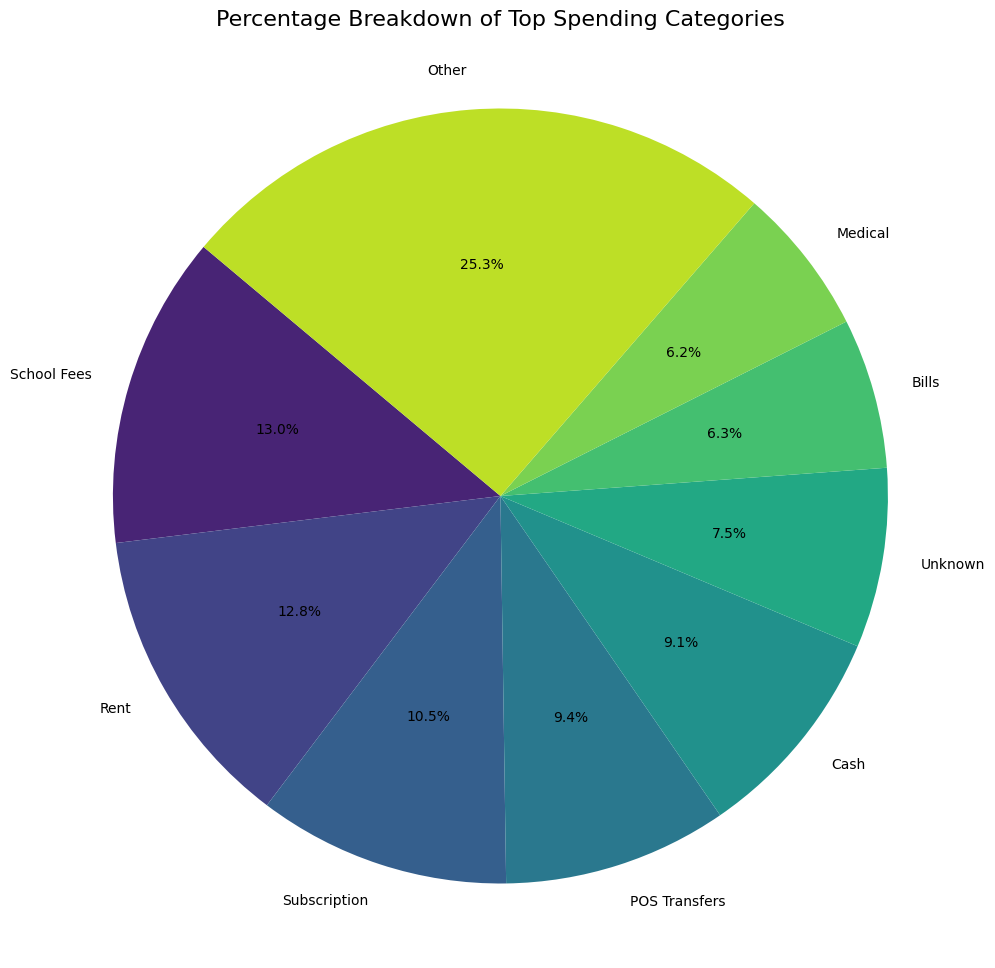

In [ ]:
plt.figure(figsize=(11, 12))
plt.pie(plot_data["Percentage"], labels=plot_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(plot_data)))
plt.title('Percentage Breakdown of Top Spending Categories', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

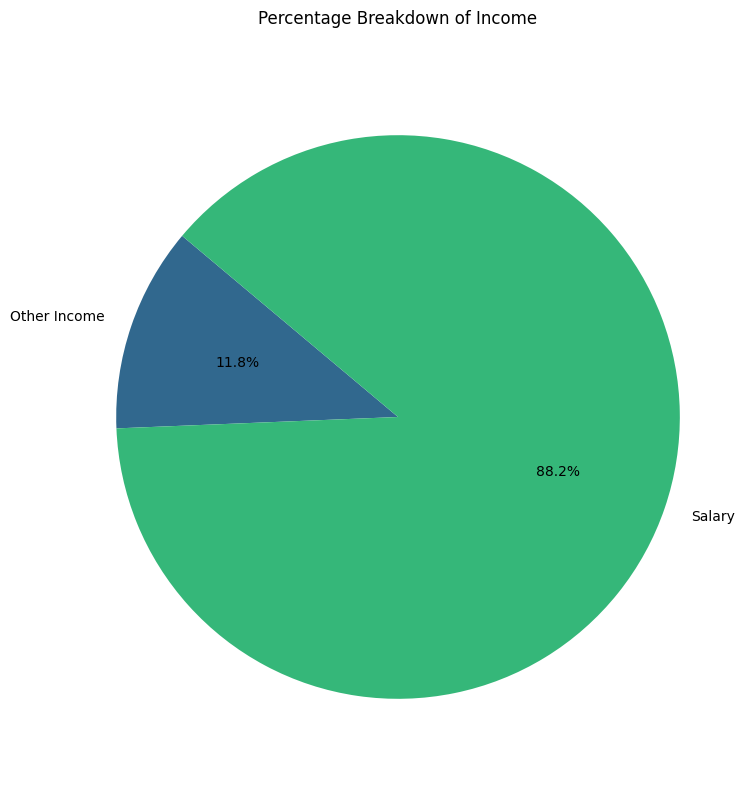

In [ ]:
plt.figure(figsize = (8, 10))
plt.pie(inc_cat["Percentage"], labels = inc_cat.index, autopct = "%1.1f%%", startangle = 140, colors = sns.color_palette("viridis", len(inc_cat)))
plt.title("Percentage Breakdown of Income")
plt.axis("equal")
plt.show()

## Monthly Income and Expense Trends

I will create two DataFrames, one for monthly income and one for monthly expenses, by filtering the main 'data' DataFrame. For expenses, I'll convert the amounts to absolute values. Then, I'll define a chronological order for months and reindex both DataFrames to ensure proper sorting and handle any missing months with zeros. Finally, I will visualize these trends using two line plots on subplots to clearly display monthly income and expense fluctuations.

In [ ]:
data

,Date,Description,Category,Month,Amount
467,2024-08-31,Cash Withdrawal,Cash,August,-10000
129,2024-08-30,Electricity Bill,Bills,August,-8922
388,2024-08-08,Water Bill,Bills,August,-7157
478,2024-08-31,POS Purchase,POS Transfers,August,-8477
375,2024-08-05,Fuel Station,Fuel,August,-3203
...,...,...,...,...,...
141,2024-09-25,Pharmacy Purchase,Medical,September,-9507
468,2024-09-22,Uber Ride,Transport,September,-12038
138,2024-09-25,Cash Withdrawal,Cash,September,-10000
452,2024-09-18,Loan Repayment,Loan,September,-15000


In [ ]:
month_order = ['July', 'August', 'September', 'October', 'November', 'December']

inc = data[data["Amount"] > 0]
exp = data[data["Amount"] < 0]

display(
    inc,
    exp
)

,Date,Description,Category,Month,Amount
472,2024-08-04,Airtime Recharge,Airtime,August,9489
500,2024-08-03,Cash Deposit,POS Transfers,August,20000
105,2024-08-26,Transfer In,Other Income,August,20000
126,2024-08-28,Transfer In,Other Income,August,10000
197,2024-08-24,Netflix Subscription,Subscription,August,10163
...,...,...,...,...,...
519,2024-09-04,Transfer In,Other Income,September,20000
104,2024-09-03,Salary Payment,Salary,September,180000
419,2024-09-07,Transfer In,Other Income,September,10000
453,2024-09-10,Transfer In,Other Income,September,10000


,Date,Description,Category,Month,Amount
467,2024-08-31,Cash Withdrawal,Cash,August,-10000
129,2024-08-30,Electricity Bill,Bills,August,-8922
388,2024-08-08,Water Bill,Bills,August,-7157
478,2024-08-31,POS Purchase,POS Transfers,August,-8477
375,2024-08-05,Fuel Station,Fuel,August,-3203
...,...,...,...,...,...
141,2024-09-25,Pharmacy Purchase,Medical,September,-9507
468,2024-09-22,Uber Ride,Transport,September,-12038
138,2024-09-25,Cash Withdrawal,Cash,September,-10000
452,2024-09-18,Loan Repayment,Loan,September,-15000


In [ ]:
monthly_inc = inc.groupby('Month')['Amount'].sum()
monthly_exp = exp.groupby('Month')['Amount'].sum().abs()

In [ ]:
monthly_inc = monthly_inc.reindex(month_order)
monthly_exp = monthly_exp.reindex(month_order)

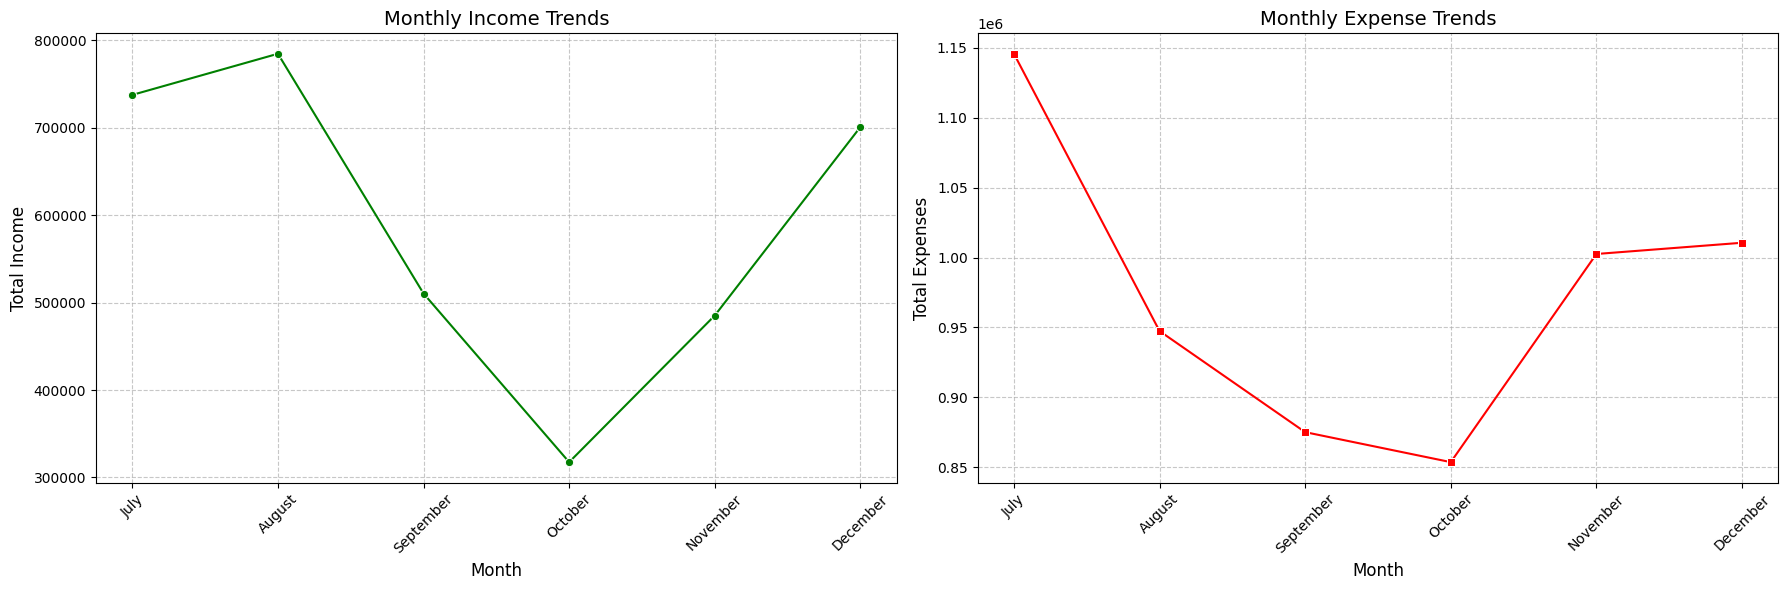

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot(x=monthly_inc.index, y=monthly_inc.values, marker='o', ax=axes[0], color='green')
axes[0].set_title('Monthly Income Trends', fontsize=14)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Total Income', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.lineplot(x=monthly_exp.index, y=monthly_exp.values, marker='s', ax=axes[1], color='red')
axes[1].set_title('Monthly Expense Trends', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Total Expenses', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3367994570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cat_group.index, y=cat_group['Amount'], palette='viridis')


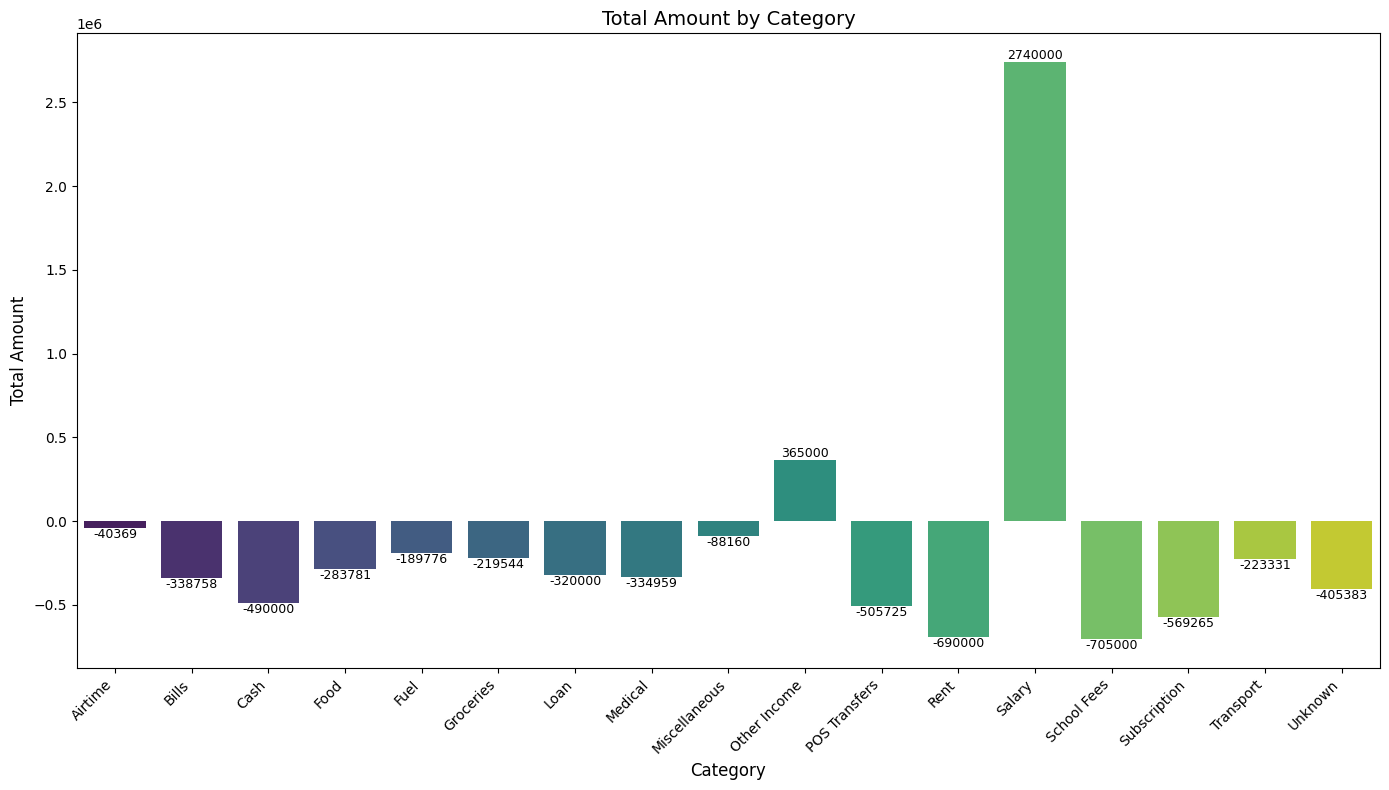

In [ ]:
month_order = ['July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=cat_group.index, y=cat_group['Amount'], palette='viridis')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.title('Total Amount by Category', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add actual numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

# cat_group.plot(kind = "bar", rot = 90, cmap = 'viridis')


---
---
---
## Summary:

### Data Analysis Key Findings

*   The overall financial analysis revealed a significant deficit, with total expenses of \$5,835,299.00 vastly exceeding a total income of \$3,536,248.00, resulting in a negative net balance of \$2,299,051.00.
*   **Top Spending Categories:** A breakdown of expenses showed that:
> 'Miscellaneous' (14.68%)
>
> 'Rent' (12.77%)
>
> 'Subscription' (10.53%)
>
> 'POS Transfers' (9.36%)
>
> 'Cash' (9.07%)
>
> 'Unknown' (7.50%)
>
> 'Bills' (6.27%)

.. were the leading individual expense categories.
> An `'Other' category`, comprising smaller expenses like Loan, Food, Transport, Groceries, Fuel, and Airtime, accounted for a combined 29.83%.
*   **Monthly Trends:** Visualizations of monthly trends indicated fluctuations in both income and expenses over the period from July to December. Both income and expenses show variations, highlighting the dynamic nature of financial inflows and outflows.
*   **Category Reclassification:** Specific transactions within the 'Miscellaneous' category were successfully re-categorized to provide better clarity. 'School Fees' (20 transactions) were moved to 'Education', and 'Gym Membership' (19 transactions) were moved to 'Fitness'. Transactions described as 'Unknown' remained in the 'Unknown' category, as no clearer description was available.

### Insights or Next Steps

*   **Address Financial Deficit:** Given the substantial negative net balance, a comprehensive budget review is critical. Focus on identifying specific high-impact expenses, particularly within 'Miscellaneous', 'Rent', and 'Subscription', to explore cost-reduction opportunities.
*   **Investigate 'Unknown' and 'Cash' Transactions:** Further investigation is needed for transactions remaining in the 'Unknown' category to ensure accurate financial tracking. Additionally, a detailed analysis of 'Cash' transactions (9.07% of expenses) could provide insights into spending habits that are currently less transparent.